In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,\
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [82]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, MaxAbsScaler

In [28]:
N = 20

X= np.random.randint(-3,3,(N,2)) + np.random.rand(N,2)

X

array([[-0.19415153, -0.51862544],
       [ 0.65007295, -1.07270029],
       [-0.61801912,  0.86822135],
       [-0.64019773, -0.06719706],
       [ 2.01737597, -1.05584982],
       [-0.71656625,  1.41058934],
       [ 0.79810723,  0.21808864],
       [ 2.93029652, -2.4252215 ],
       [ 1.07671665,  2.29372304],
       [ 1.34337233, -1.86126644],
       [ 0.20988395, -1.08052789],
       [ 2.71393958,  1.30395089],
       [ 1.82608681,  0.33454775],
       [-1.29808842, -2.98009499],
       [ 1.04200042,  0.18666678],
       [ 1.41049079, -2.02666177],
       [-2.31191515,  1.52321627],
       [ 2.93659917, -2.25398912],
       [-0.9444621 ,  1.7150468 ],
       [ 2.1208149 , -0.30612276]])

In [29]:
mm_scaler = MinMaxScaler()
s_scaler = StandardScaler()
r_scaler = RobustScaler()
n_scaler = Normalizer()
ma_scaler = MaxAbsScaler()

In [30]:
x_mm = mm_scaler.fit_transform(X)
x_s = s_scaler.fit_transform(X)
x_r = r_scaler.fit_transform(X)
x_n = n_scaler.fit_transform(X)
x_ma = ma_scaler.fit_transform(X)

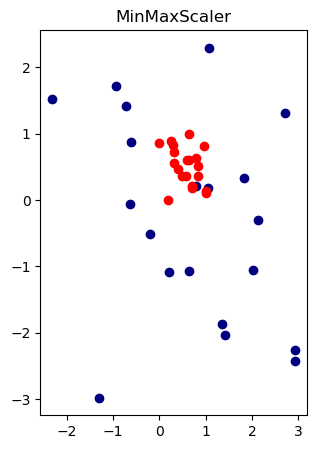

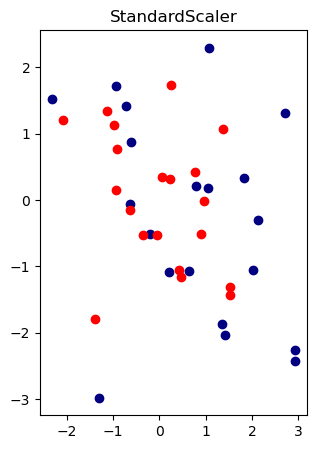

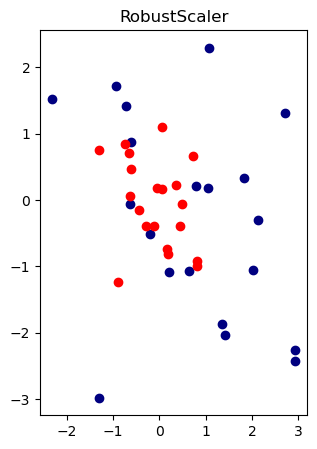

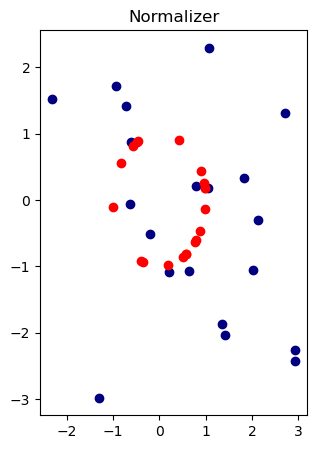

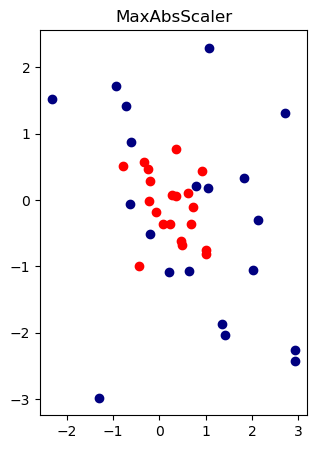

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.scatter(X[:,0],X[:,1], c='navy')
plt.scatter(x_mm[:,0],x_mm[:,1], c='red')
plt.title('MinMaxScaler')

plt.figure(figsize=(20,5))
plt.subplot(1,5,2)
plt.scatter(X[:,0],X[:,1], c='navy')
plt.scatter(x_s[:,0],x_s[:,1], c='red')
plt.title('StandardScaler')

plt.figure(figsize=(20,5))
plt.subplot(1,5,3)
plt.scatter(X[:,0],X[:,1], c='navy')
plt.scatter(x_r[:,0],x_r[:,1], c='red')
plt.title('RobustScaler')

plt.figure(figsize=(20,5))
plt.subplot(1,5,4)
plt.scatter(X[:,0],X[:,1], c='navy')
plt.scatter(x_n[:,0],x_n[:,1], c='red')
plt.title('Normalizer');

plt.figure(figsize=(20,5))
plt.subplot(1,5,5)
plt.scatter(X[:,0],X[:,1], c='navy')
plt.scatter(x_ma[:,0],x_ma[:,1], c='red')
plt.title('MaxAbsScaler');

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
from sklearn.datasets import load_breast_cancer

In [36]:
X,y = load_breast_cancer(return_X_y = True)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X,y,random_state=0)

In [47]:
Xc_train_mm_scaled = mm_scaler.fit_transform(Xc_train)
Xc_test_mm_scaled = mm_scaler.transform(Xc_test)

In [49]:
#No_Scaling

svc = SVC()
svc.fit(Xc_train,yc_train)
print(f'Training Score: {svc.score(Xc_train, yc_train)}')
print(f'Test Score: {svc.score(Xc_test, yc_test)}')

Training Score: 0.903755868544601
Test Score: 0.9370629370629371


In [50]:
#MinMaxScaling

svc = SVC()
svc.fit(Xc_train_mm_scaled,yc_train)
print(f'Training Score: {svc.score(Xc_train_mm_scaled, yc_train)}')
print(f'Test Score: {svc.score(Xc_test_mm_scaled, yc_test)}')

Training Score: 0.9835680751173709
Test Score: 0.972027972027972


In [51]:
Xc_train_s_scaled = s_scaler.fit_transform(Xc_train)
Xc_test_s_scaled = s_scaler.transform(Xc_test)

In [52]:
#StandardScaling

svc = SVC()
svc.fit(Xc_train_s_scaled,yc_train)
print(f'Training Score: {svc.score(Xc_train_s_scaled, yc_train)}')
print(f'Test Score: {svc.score(Xc_test_s_scaled, yc_test)}')

Training Score: 0.9859154929577465
Test Score: 0.965034965034965


In [53]:
Xc_train_n_scaled = s_scaler.fit_transform(Xc_train)
Xc_test_n_scaled = s_scaler.transform(Xc_test)

In [54]:
#Normalizer

svc = SVC()
svc.fit(Xc_train_n_scaled,yc_train)
print(f'Training Score: {svc.score(Xc_train_n_scaled, yc_train)}')
print(f'Test Score: {svc.score(Xc_test_n_scaled, yc_test)}')

Training Score: 0.9859154929577465
Test Score: 0.965034965034965


In [55]:
#Comparison

scaler_dict = {'None':None, 
               'MinMaxScaler': MinMaxScaler(),
               'StandardScaler': StandardScaler(),
               'RobustScaler': RobustScaler(),
               'Normalizer': Normalizer(),
               'MaxAbsScaler': MaxAbsScaler()
              }


In [76]:
model_dict = {'knn':KNeighborsClassifier(),
               'perceptron':Perceptron(),
               'Logistic_Regression':LogisticRegression(max_iter=3000),
               'Decision_Tree':DecisionTreeClassifier(random_state=0),
               'Random_Forest':RandomForestClassifier(random_state=0),
                'Extra_Trees': ExtraTreesClassifier(random_state=0),
                'AdaBoost':AdaBoostClassifier(random_state=0),
                'GradientBoostingClassifier':GradientBoostingClassifier(random_state=0),
                'naive_bayes': GaussianNB()
               }

In [93]:
df = pd.DataFrame(columns=['Scaler', 'Model', 'Training Score', 'Test Score'])

for s_name, scaler in scaler_dict.items():
    print(s_name)
    if s_name=='None':
        Xc_train_scaled=Xc_train
        Xc_test_scaled=Xc_test
    else:
        Xc_train_scaled = scaler.fit_transform(Xc_train)
        Xc_test_scaled = scaler.transform(Xc_test)
    for m_name, model in model_dict.items():
        model.fit(Xc_train_scaled, yc_train)
        training_score = model.score(Xc_train_scaled, yc_train)
        test_score = model.score(Xc_test_scaled, yc_test)
        df.loc[len(df)] = s_name , m_name, training_score, test_score
df

None
MinMaxScaler
StandardScaler
RobustScaler
Normalizer
MaxAbsScaler


,Scaler,Model,Training Score,Test Score
0,None,knn,0.941315,0.937063
1,None,perceptron,0.849765,0.853147
2,None,Logistic_Regression,0.960094,0.951049
3,None,Decision_Tree,1.000000,0.881119
4,None,Random_Forest,1.000000,0.972028
5,None,Extra_Trees,1.000000,0.972028
6,None,AdaBoost,1.000000,0.979021
7,None,GradientBoostingClassifier,1.000000,0.958042
8,None,naive_bayes,0.950704,0.937063
9,MinMaxScaler,knn,0.976526,0.958042


In [86]:
df.sort_values('Test Score', ascending = False).head()

,Scaler,Model,Training Score,Test Score
24,StandardScaler,AdaBoost,1.0,0.979021
15,MinMaxScaler,AdaBoost,1.0,0.979021
6,None,AdaBoost,1.0,0.979021
51,MaxAbsScaler,AdaBoost,1.0,0.979021
33,RobustScaler,AdaBoost,1.0,0.979021


In [95]:
df[df['Model']=='Decision_Tree']

,Scaler,Model,Training Score,Test Score
3,None,Decision_Tree,1.0,0.881119
12,MinMaxScaler,Decision_Tree,1.0,0.881119
21,StandardScaler,Decision_Tree,1.0,0.881119
30,RobustScaler,Decision_Tree,1.0,0.881119
39,Normalizer,Decision_Tree,1.0,0.944056
48,MaxAbsScaler,Decision_Tree,1.0,0.881119
